In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
headers = pd.read_csv('../data/S_AB.dat', delim_whitespace=True, nrows=0).columns[1:]
results = pd.read_csv('../data/S_AB.dat', delim_whitespace=True, header=None, skiprows=1, names=headers)

display(results)

,ImpactParameter,S_AB,Stderr(S_AB)
0,0.0,0.988049,4.977870e-06
1,0.1,0.988056,4.464210e-06
2,0.2,0.988060,5.398170e-06
3,0.3,0.988075,3.880150e-06
4,0.4,0.988101,6.201610e-06
...,...,...,...
195,19.5,0.999927,3.834880e-07
196,19.6,0.999931,3.722310e-07
197,19.7,0.999933,3.755160e-07
198,19.8,0.999936,3.203970e-07


In [3]:
b = np.array(results['ImpactParameter'])
S_AB = np.array(results['S_AB'])
S_AB_stderr = np.array(results['Stderr(S_AB)'])

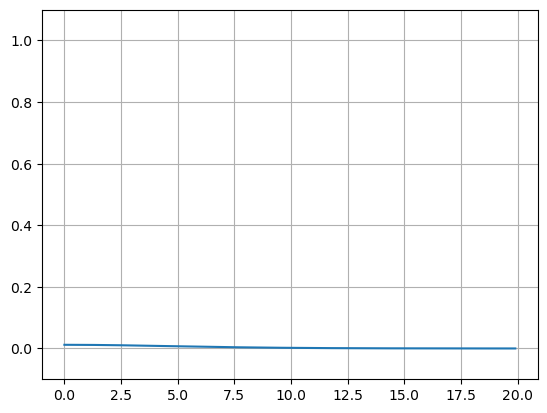

In [4]:
fig, ax = plt.subplots()

ax.plot(b, (1 - S_AB))

ax.grid()
ax.set_ylim(-0.1, 1.1)

plt.show()

In [5]:
10 * np.sqrt(np.sum(np.convolve((b * S_AB_stderr) ** 2, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid') / 2))

0.0005333524859114684

In [6]:
sigma_tot = 10 * 4 * np.pi * np.sum(np.convolve((1 - S_AB) * b, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid'))

print(sigma_tot, "mb")

42.563243518541796 mb


In [7]:
sigma_el = 10 * 2 * np.pi * np.sum(np.convolve((1 - S_AB) ** 2 * b, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid'))

print(sigma_el, "mb")

0.11541197962286447 mb


In [8]:
sigma_reac = 10 * 2 * np.pi * np.sum(np.convolve((1 - S_AB ** 2) * b, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid'))

print(sigma_reac, "mb")

42.447831538918905 mb
